In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import re
import os

### Lessons learned
* Make notes on classic EDA stuff
 * grouping and aggregating
 * summary statistics
 * basic plots
 * correlations
* os basics
* regexp basics

How to improve the data
* good column names from the start
* no unnecessary whitespace
* sensible group names

# Cell data distributions with $\theta$ variable

In [3]:
celldata = pd.DataFrame(columns=pd.read_csv('celldata/delaunay/cell_data_2_6_20180904_18_29_56_21598.txt', sep = ';').columns)

for filename in os.listdir('celldata/delaunay'):
    newdata = pd.read_csv('celldata/delaunay/'+ filename, sep=';')
    # print(newdata)
    celldata = celldata.append(newdata)
    
celldata = celldata.reset_index()

In [501]:
celldata = pd.DataFrame(columns=pd.read_csv('celldata/theta_var/cell_data_3_6_20180903_15_11_51.txt', sep = ';').columns)

for filename in os.listdir('celldata/theta_var'):
    newdata = pd.read_csv('celldata/theta_var/'+ filename, sep=';')
    # print(newdata)
    celldata = celldata.append(newdata)
    
celldata = celldata.reset_index()

In [497]:
celldata = pd.DataFrame(columns=pd.read_csv('celldata/theta_mix/cell_data_3_6_20180904_07_09_28_85296.txt', sep = ';').columns)

for filename in os.listdir('celldata/theta_mix'):
    newdata = pd.read_csv('celldata/theta_mix/'+ filename, sep=';')
    # print(newdata)
    celldata = celldata.append(newdata)
    
celldata = celldata.reset_index()

In [23]:
celldata = pd.DataFrame(columns=pd.read_csv('celldata/delaunay_z/cell_data_2_6_20180906_17_01_55_89281.txt', sep = ';').columns)

for filename in os.listdir('celldata/delaunay_z/'):
    newdata = pd.read_csv('celldata/delaunay_z/'+ filename, sep=';')
    # print(newdata)
    celldata = celldata.append(newdata)
    
celldata = celldata.reset_index()

In [4]:
celldata['theta'].value_counts()

0.1     100
10.0    100
8.0     100
6.0     100
5.0     100
4.0     100
1.0     100
7.0      99
2.0      99
Name: theta, dtype: int64

### Multiple theta plots

In [29]:
celldata.groupby(['theta'])['theta_est','theta_known_z_est'].agg(['mean','std'])

KeyError: "Columns not found: 'theta_known_z_est'"

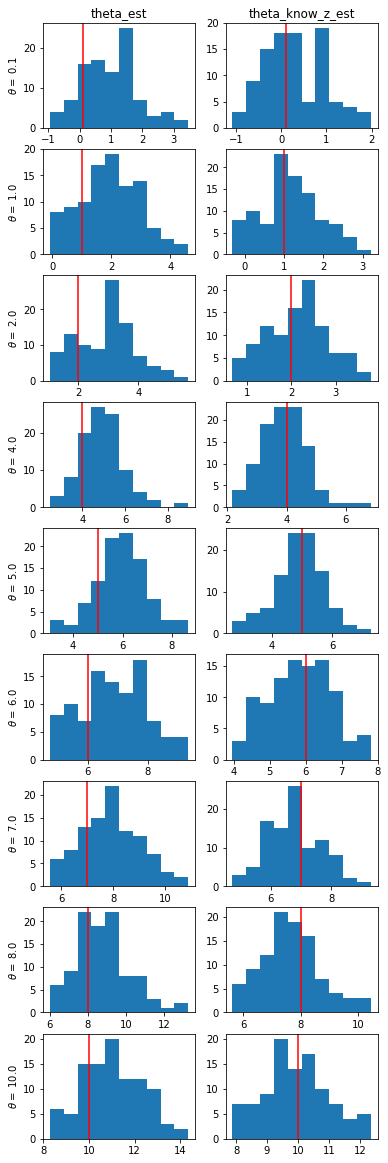

In [71]:
groupnum = len(celldata.groupby(['theta']))
thetas = celldata.groupby(['theta'])['theta_est','theta_known_z_est'].agg(['mean','std']).index

for i, theta in enumerate(thetas):
    plt.subplot(groupnum,2,2*i+1)
    plt.ylabel(r'$\theta = $ ' + str(theta))
    plt.hist(celldata.loc[celldata['theta'] == thetas[i], 'theta_est'])
    plt.axvline(x=thetas[i], c='r')
    if (i==0):
        plt.title('theta_est')

    plt.subplot(groupnum,2,2*i+2)
    plt.hist(celldata.loc[celldata['theta'] == thetas[i], 'theta_known_z_est'])
    plt.axvline(x=thetas[i], c='r')
    if (i==0):
        plt.title('theta_know_z_est')
    
# plt.tight_layout(pad = 2, w_pad = 2, h_pad = 5)
plt.subplots_adjust(top=4)

# plt.show()

plt.savefig('estimates_mult.pdf')

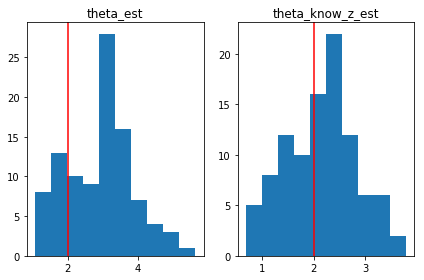

In [36]:
theta = 2.0
plt.subplot(1,2,1)
plt.hist(celldata.loc[celldata['theta'] == theta, 'theta_est'])
plt.axvline(x=theta, c='r')
plt.title('theta_est')

plt.subplot(1,2,2)
plt.hist(celldata.loc[celldata['theta'] == theta, 'theta_known_z_est'])
plt.axvline(x=theta, c='r')
plt.title('theta_know_z_est')

plt.tight_layout()

plt.show()

In [15]:
# Filter null values (should be none)
print(np.sum(celldata['theta_est'].isnull()))
celldata = celldata.loc[celldata['theta_est'].notnull()]

0


In [12]:
# Filter anomalous values 
print(np.sum(np.abs(celldata['theta_est']) > 100))
celldata = celldata.loc[np.abs(celldata['theta_est']) < 100]

1


In [5]:
celldataA = celldata.loc[celldata['theta']== 0.1]

In [6]:
np.mean(celldataA['theta_est']), np.std(celldataA['theta_est'])

(-98.83727314410002, 993.1418412808518)

In [7]:
np.mean(celldataA['theta_known_z_est']), np.std(celldataA['theta_known_z_est'])

(0.2767725534, 0.6990288974130372)

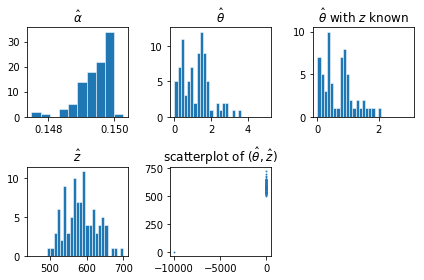

In [8]:
plt.subplot(2,3,1)
plt.title(r'$\hat\alpha$')
plt.hist(celldataA['alpha_est'], edgecolor='white', linewidth=0.5)

plt.subplot(2,3,2)
plt.title(r'$\hat\theta$')
plt.hist(celldataA['theta_est'], bins = np.linspace(0,5,30), edgecolor='white', linewidth=0.5)

plt.subplot(2,3,3)
plt.title(r'$\hat\theta$ with $z$ known')
plt.hist(celldataA['theta_known_z_est'], bins = np.linspace(0,3,30), edgecolor='white', linewidth=0.5)

plt.subplot(2,3,4)
plt.title(r'$\hat z$')
plt.hist(celldataA['z_est'], bins = np.linspace(450,700,30), edgecolor='white', linewidth=0.5)

plt.subplot(2,3,5)
plt.title(r'scatterplot of $(\hat\theta,\hat z)$')
plt.scatter(celldataA['theta_est'], celldataA['z_est'], alpha=0.9, s=0.8)

plt.tight_layout()
plt.show()

# plt.savefig('estimates_delaunay.pdf')

In [14]:
thetaA = 0.1
thetaB = 10

In [15]:
celldataA = celldata.loc[celldata['theta']==thetaA,].iloc[0]
celldataB = celldata.loc[celldata['theta']==thetaB,].iloc[0]


---

In [16]:
def listify(string):
        strlist = string[1:-2].replace(' ','').split(',')[:-1]
        result = [float(num) for num in strlist]
        return(result)

---

In [17]:
volumesA = listify(celldataA.tetra_volume)
volumesB = listify(celldataB.tetra_volume)

circumA = listify(celldataA.tetra_circum)
circumB = listify(celldataB.tetra_circum)

surfA = listify(celldataA.face_surf)
surfB = listify(celldataB.face_surf)

lengthA = listify(celldataA.edge_length)
lengthB = listify(celldataB.edge_length)

degreeA = listify(celldataA.point_degree)
degreeB = listify(celldataB.point_degree)

### Plot of one distribution

In [42]:
round(np.mean(volumesA),6)

0.000277

In [39]:
round(np.mean(surfA),5)

0.00903

In [40]:
round(np.mean(lengthA),5)

0.15535

In [41]:
round(np.mean(degreeA),5)

15.5937

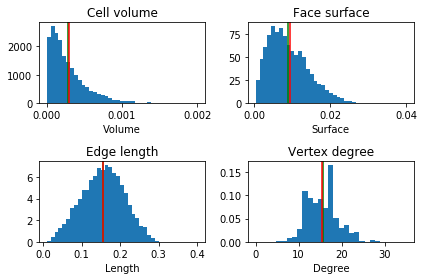

In [36]:
plt.subplot(2,2,1)
bins = np.linspace(0,0.002,40)
plt.hist(volumesA, bins, density = True)
plt.xlabel("Volume")
plt.axvline(x=np.mean(volumesA), c='g')
plt.axvline(x=0.000296, c='r')
#plt.ylabel("Density")
plt.title('Cell volume')
plt.locator_params(nbins=4)

plt.subplot(2,2,2)
bins_surf = np.linspace(0.0004,0.04,40)
plt.hist(surfA,bins_surf, density = True)
plt.xlabel("Surface")
plt.axvline(x=np.mean(surfA), c='g')
plt.axvline(x=0.00948, c='r')
#plt.ylabel("Density")
plt.title('Face surface')
plt.locator_params(nbins=4)

plt.subplot(2,2,3)
bins_length = np.linspace(0.01,0.4,40)
plt.hist(lengthA,bins_length, density = True)
plt.xlabel("Length")
plt.axvline(x=np.mean(lengthA), c='g')
plt.axvline(x=0.1559, c='r')
#plt.ylabel("Density")
plt.title('Edge length')
plt.locator_params(nbins=6)

plt.subplot(2,2,4)
bins_deg = np.linspace(0,35,30)
plt.hist(degreeA,bins_deg, density = True)
plt.xlabel("Degree")
plt.axvline(x=np.mean(degreeA), c='g')
plt.axvline(x=15.535, c='r')
#plt.ylabel("Density")
plt.title('Vertex degree')
plt.locator_params(nbins=6)

plt.tight_layout()
#plt.show()

plt.savefig('facets_Poisson.pdf')

### Comparison plot

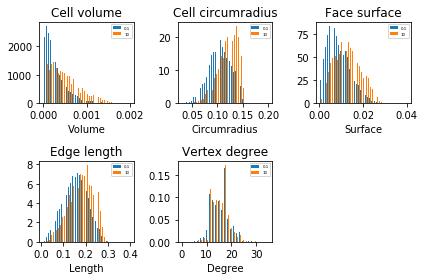

In [18]:
plt.subplot(2,3,1)
bins = np.linspace(0,0.002,40)
plt.hist([volumesA,volumesB],bins, density = True,  label=[thetaA,thetaB])
plt.legend(loc='upper right',prop={'size': 4})
plt.xlabel("Volume")
#plt.ylabel("Density")
plt.title('Cell volume')
plt.locator_params(nbins=4)

plt.subplot(2,3,2)
bins_circum = np.linspace(0.03,0.2,40)
plt.hist([circumA,circumB],bins_circum, density = True, label=[thetaA,thetaB])
plt.legend(loc='upper right',prop={'size': 4})
plt.xlabel("Circumradius")
#plt.ylabel("Density")
plt.title('Cell circumradius')
plt.locator_params(nbins=4)


plt.subplot(2,3,3)
bins_surf = np.linspace(0.0004,0.04,40)
plt.hist([surfA,surfB],bins_surf, density = True, label=[thetaA,thetaB])
plt.legend(loc='upper right',prop={'size': 4})
plt.xlabel("Surface")
#plt.ylabel("Density")
plt.title('Face surface')
plt.locator_params(nbins=4)


plt.subplot(2,3,4)
bins_length = np.linspace(0.01,0.4,40)
plt.hist([lengthA,lengthB],bins_length, density = True, label=[thetaA, thetaB])
plt.legend(loc='upper right',prop={'size': 4})
plt.xlabel("Length")
#plt.ylabel("Density")
plt.title('Edge length')
plt.locator_params(nbins=6)

plt.subplot(2,3,5)
bins_deg = np.linspace(0,35,30)
plt.hist([degreeA,degreeB],bins_deg, density = True, label=[thetaA, thetaB])
plt.legend(loc='upper right',prop={'size': 4})
plt.xlabel("Degree")
#plt.ylabel("Density")
plt.title('Vertex degree')
plt.locator_params(nbins=6)

plt.tight_layout()
plt.show()

# plt.savefig('facets_extr.pdf')

### Summary stats table prep

In [378]:
print('{0:.5f}'.format(np.mean(volumesA)) + ' (' + '{0:.5f}'.format(np.std(volumesA)) + ')' + ' & ' +  '{0:.5f}'.format(np.mean(volumesB)) + ' (' + '{0:.5f}'.format(np.std(volumesB)) + ') \\\\')
print('{0:.4f}'.format(np.mean(circumA)) + ' (' + '{0:.4f}'.format(np.std(circumA)) + ')' +' & ' + '{0:.4f}'.format(np.mean(circumB)) + ' (' + '{0:.4f}'.format(np.std(circumB)) + ') \\\\')
print('{0:.4f}'.format(np.mean(surfA)) + ' (' + '{0:.4f}'.format(np.std(surfA)) + ')' +' & ' + '{0:.4f}'.format(np.mean(surfB)) + ' (' + '{0:.4f}'.format(np.std(surfB)) + ') \\\\')
print('{0:.2f}'.format(np.mean(lengthA)) + ' (' + '{0:.2f}'.format(np.std(lengthA)) + ')' + ' & ' + '{0:.2f}'.format(np.mean(lengthB)) + ' (' + '{0:.2f}'.format(np.std(lengthB)) + ') \\\\')
print('{0:.2f}'.format(np.mean(degreeA)) + ' (' + '{0:.2f}'.format(np.std(degreeA)) + ')' + ' & ' + '{0:.2f}'.format(np.mean(degreeB)) + ' (' + '{0:.2f}'.format(np.std(degreeB)) + ') \\\\')


0.00033 (0.00024) & 0.00044 (0.00030) \\
0.1104 (0.0190) & 0.1157 (0.0196) \\
0.0099 (0.0049) & 0.0116 (0.0055) \\
0.16 (0.05) & 0.17 (0.05) \\
15.09 (4.04) & 15.14 (3.80) \\


In [ ]:
)
circumB = listify(celldataB.tetra_circum)

surfA = listify(celldataA.face_surf)
surfB = listify(celldataB.face_surf)

lengthA = listify(celldataA.edge_length)
lengthB = listify(celldataB.edge_length)

degreeA = listify(celldataA.point_degree

---

# Estimation -  

- []Circumradius different length
- [x]Files not saved
- []Negative theta - just anomalous results + biasedness?
- []Nonsense results in estimation sometimes
- []Estimates are not centered at the estimated value
- [x]Edge length multimodality

### Cell data

In [481]:
celldata = pd.DataFrame(columns=pd.read_csv('celldata/theta2_real/cell_data_3_6_20180904_00_20_56_32900.txt', sep = ';').columns)

for filename in os.listdir('celldata/theta2_real'):
    newdata = pd.read_csv('celldata/theta2_real/'+ filename, sep=';')
    celldata = celldata.append(newdata)
    
celldata = celldata.reset_index()

In [482]:
celldata

,index,epsilon,alpha,theta,z,max_weight,energy,tetra_volume,tetra_circum,face_surf,...,point_degree,cells,vertices,removable,epsilon_est,face_est,alpha_est,theta_est,z_est,theta_known_z_est
0,0,0,0.15,2,500,0.01,245.725,"[0.000478451, 0.000206602, 0.00132736, 0.00120...","[0.105581, 0.114971, 0.148778, 0.141156, 0.123...","[0.0105034, 0.0141696, 0.0197947, 0.0171288, 0...",...,"[12, 16, 16, 15, 20, 8, 18, 18, 18, 17, 21, 11...",557,183,80,0.030973,0.000957,0.149231,3.207000,371.577,4.28393
1,0,0,0.15,2,500,0.01,251.193,"[0.000227356, 0.000579247, 0.000808271, 0.0002...","[0.102394, 0.12662, 0.128309, 0.112437, 0.1091...","[0.0159266, 0.0179643, 0.0194721, 0.0110092, 0...",...,"[21, 15, 16, 20, 13, 8, 20, 17, 21, 16, 17, 17...",564,190,85,0.015839,0.000314,0.149106,1.514550,303.814,3.46852
2,0,0,0.15,2,500,0.01,249.076,"[0.000576545, 0.000205768, 7.76973e-05, 0.0006...","[0.124133, 0.0981826, 0.100357, 0.110241, 0.14...","[0.0184124, 0.0228495, 0.0107132, 0.00963208, ...",...,"[16, 11, 16, 14, 19, 14, 12, 15, 21, 24, 21, 2...",629,191,88,0.019990,0.000466,0.148530,1.873850,330.580,3.46786
3,0,0,0.15,2,500,0.01,252.083,"[0.000480196, 0.000365187, 0.000334398, 0.0001...","[0.137459, 0.115247, 0.114375, 0.0936415, 0.11...","[0.00999003, 0.0088784, 0.0205207, 0.0210338, ...",...,"[16, 17, 17, 18, 19, 18, 19, 17, 19, 15, 19, 1...",492,175,77,0.038868,0.001162,0.149252,0.602569,316.878,2.51374
4,0,0,0.15,2,500,0.01,250.203,"[4.86138e-05, 0.000931117, 0.000120344, 0.0001...","[0.100404, 0.13814, 0.122894, 0.137379, 0.1192...","[0.0224029, 0.0123609, 0.0172658, 0.0137275, 0...",...,"[19, 15, 20, 18, 27, 13, 25, 17, 13, 9, 20, 19...",502,171,68,0.006241,0.000074,0.149766,2.639780,355.341,3.93018
5,0,0,0.15,2,500,0.01,249.694,"[0.000547732, 0.000162823, 0.000199434, 0.0008...","[0.120289, 0.121326, 0.123946, 0.12802, 0.1190...","[0.00887602, 0.00661524, 0.020204, 0.00977494,...",...,"[17, 12, 13, 12, 20, 16, 20, 11, 12, 15, 9, 16...",516,180,64,0.023819,0.000741,0.149701,3.292830,334.080,4.71679
6,0,0,0.15,2,500,0.01,246.694,"[0.00123804, 0.0008636, 0.000411003, 0.0003462...","[0.137762, 0.143762, 0.146052, 0.118235, 0.140...","[0.0181743, 0.0145917, 0.0090598, 0.0128967, 0...",...,"[14, 10, 16, 22, 18, 21, 14, 15, 19, 14, 16, 1...",468,163,54,0.031534,0.000959,0.148224,2.140990,307.142,3.96276
7,0,0,0.15,2,500,0.01,249.184,"[0.000151172, 0.000184079, 0.000373164, 0.0010...","[0.140487, 0.11019, 0.123408, 0.128107, 0.1221...","[0.0115712, 0.0267218, 0.0143266, 0.0205133, 0...",...,"[11, 14, 13, 7, 12, 19, 15, 15, 18, 19, 13, 18...",453,159,62,0.031716,0.000821,0.149890,3.216750,390.753,4.05100
8,0,0,0.15,2,500,0.01,243.902,"[0.000158627, 0.000164878, 0.000493058, 0.0003...","[0.0959378, 0.111036, 0.13771, 0.112127, 0.080...","[0.0215998, 0.0186488, 0.0110115, 0.0134363, 0...",...,"[19, 17, 13, 16, 18, 15, 13, 18, 10, 13, 10, 1...",532,179,66,0.027490,0.000522,0.149499,4.340520,376.828,5.24473
9,0,0,0.15,2,500,0.01,242.897,"[0.000450545, 0.000137943, 0.000512288, 0.0004...","[0.128146, 0.127289, 0.129558, 0.124426, 0.127...","[0.0166185, 0.0141242, 0.010985, 0.0173035, 0....",...,"[13, 13, 13, 21, 17, 14, 15, 13, 15, 23, 15, 1...",473,168,65,0.033804,0.001451,0.149668,3.259060,340.829,4.41561


In [426]:
celldata.apply(lambda x: [len(listify(x['tetra_volume'])),len(listify(x['tetra_circum']))], axis=1)

0      [557, 557]
1      [564, 564]
2      [629, 629]
3      [492, 492]
4      [502, 502]
5      [516, 516]
6      [468, 468]
7      [453, 453]
8      [532, 532]
9      [473, 473]
10     [520, 520]
11     [507, 507]
12     [507, 507]
13     [514, 514]
14     [479, 479]
15     [484, 484]
16     [520, 520]
17     [511, 511]
18     [561, 561]
19     [505, 505]
20     [432, 432]
21     [592, 592]
22     [641, 641]
23     [473, 473]
24     [505, 505]
25     [634, 634]
26     [504, 504]
27     [565, 565]
28     [431, 431]
29     [522, 522]
          ...    
72     [527, 527]
73     [460, 460]
74     [529, 529]
75     [505, 505]
76     [489, 489]
77     [488, 488]
78     [467, 467]
79     [535, 535]
80     [579, 579]
81     [535, 535]
82     [611, 611]
83     [577, 577]
84     [569, 569]
85     [545, 545]
86     [612, 612]
87     [475, 475]
88     [527, 527]
89     [543, 543]
90     [445, 445]
91     [520, 520]
92     [587, 587]
93     [533, 533]
94     [586, 586]
95     [551, 551]
96     [53

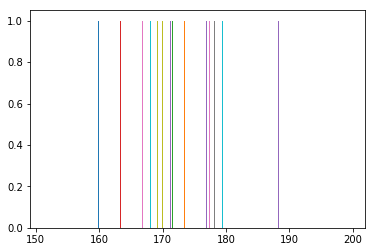

In [427]:
plt.hist(celldata['vertices'])
plt.show()

In [428]:
celldata.z_est.mean()

338.5185392156863

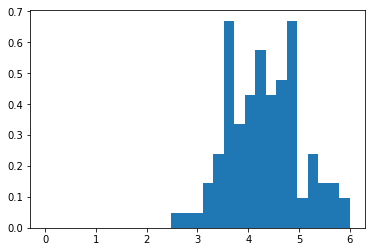

In [429]:
plt.hist(celldata.theta_known_z_est, np.linspace(0,6,30), density = True)
plt.show()

In [486]:
for i, row in enumerate(data):
    df.loc[i] = row

## $\theta$ = 2

In [487]:
df = df.loc[df['theta'] == 2.0,]

In [488]:
df

,filename,theta,epsilon,alpha,z,max_weight,iterations,pts,pts_active,pts_removable,min_edge_est,epsilon_est,alpha_est,theta_est,z_est,theta_z_known_est
0,slurmlogs/slurm-1969770.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5685.0,414.0,324.0,0.017646,0.000592,0.199717,1.609680,369.314,2.19279
1,slurmlogs/slurm-1969650.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5707.0,436.0,347.0,0.012040,0.000249,0.199460,3.008440,438.107,3.20038
2,slurmlogs/slurm-1969764.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5649.0,378.0,311.0,0.012036,0.000108,0.199710,2.528960,399.237,3.05594
4,slurmlogs/slurm-1969731.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5679.0,408.0,342.0,0.013886,0.000105,0.197951,3.604800,467.541,3.76694
5,slurmlogs/slurm-1969711.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5663.0,392.0,319.0,0.011374,0.000147,0.198508,2.407590,396.338,2.76919
6,slurmlogs/slurm-1969854.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5697.0,426.0,348.0,0.006540,0.000157,0.198203,3.093210,441.887,3.26582
7,slurmlogs/slurm-1969775.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5668.0,397.0,335.0,0.016887,0.000196,0.199825,1.624860,380.718,2.10029
8,slurmlogs/slurm-1969916.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5685.0,414.0,331.0,0.018199,0.000424,0.198859,1.819890,374.238,2.22806
9,slurmlogs/slurm-1969752.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5695.0,424.0,362.0,0.018707,0.000255,0.195951,4.556380,514.115,4.49486
10,slurmlogs/slurm-1969726.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5666.0,395.0,315.0,0.014329,0.000211,0.199889,3.802190,460.553,3.93735


### Weird observations

In [489]:
df.loc[df['epsilon_est'] > 1,]

,filename,theta,epsilon,alpha,z,max_weight,iterations,pts,pts_active,pts_removable,min_edge_est,epsilon_est,alpha_est,theta_est,z_est,theta_z_known_est
34,slurmlogs/slurm-1969905.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5712.0,441.0,358.0,0.006510,8.01542,5.0,358.0,2.80902,456.522
35,slurmlogs/slurm-1969891.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5698.0,427.0,353.0,0.008832,8.36300,5.0,353.0,3.71954,493.735
49,slurmlogs/slurm-1969894.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5707.0,436.0,363.0,0.011119,9.01685,5.0,363.0,3.09812,468.748
113,slurmlogs/slurm-1969879.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5690.0,419.0,337.0,0.013602,8.73584,5.0,337.0,3.07457,430.780
133,slurmlogs/slurm-1969646.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5665.0,394.0,325.0,0.007162,9.71411,5.0,325.0,3.51121,430.830
223,slurmlogs/slurm-1969864.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5664.0,393.0,318.0,0.011100,7.49833,5.0,318.0,3.69462,437.466
225,slurmlogs/slurm-1969716.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5691.0,420.0,350.0,0.013194,9.57934,5.0,350.0,3.44751,465.086
261,slurmlogs/slurm-1969884.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5677.0,406.0,326.0,0.003071,9.02067,5.0,326.0,1.73061,377.659


In [490]:
df.loc[df['theta_est'] > 10,]

,filename,theta,epsilon,alpha,z,max_weight,iterations,pts,pts_active,pts_removable,min_edge_est,epsilon_est,alpha_est,theta_est,z_est,theta_z_known_est
34,slurmlogs/slurm-1969905.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5712.0,441.0,358.0,0.006510,8.015420,5.000000,358.00,2.80902,456.52200
35,slurmlogs/slurm-1969891.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5698.0,427.0,353.0,0.008832,8.363000,5.000000,353.00,3.71954,493.73500
49,slurmlogs/slurm-1969894.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5707.0,436.0,363.0,0.011119,9.016850,5.000000,363.00,3.09812,468.74800
113,slurmlogs/slurm-1969879.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5690.0,419.0,337.0,0.013602,8.735840,5.000000,337.00,3.07457,430.78000
133,slurmlogs/slurm-1969646.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5665.0,394.0,325.0,0.007162,9.714110,5.000000,325.00,3.51121,430.83000
223,slurmlogs/slurm-1969864.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5664.0,393.0,318.0,0.011100,7.498330,5.000000,318.00,3.69462,437.46600
225,slurmlogs/slurm-1969716.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5691.0,420.0,350.0,0.013194,9.579340,5.000000,350.00,3.44751,465.08600
261,slurmlogs/slurm-1969884.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5677.0,406.0,326.0,0.003071,9.020670,5.000000,326.00,1.73061,377.65900
265,slurmlogs/slurm-1969751.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5658.0,387.0,318.0,0.019312,0.000191,0.199664,9921.88,0.00000,1.19978


### Continue without them

In [491]:
df = df.loc[df['theta_est'] < 10,]

In [492]:
df

,filename,theta,epsilon,alpha,z,max_weight,iterations,pts,pts_active,pts_removable,min_edge_est,epsilon_est,alpha_est,theta_est,z_est,theta_z_known_est
0,slurmlogs/slurm-1969770.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5685.0,414.0,324.0,0.017646,0.000592,0.199717,1.609680,369.314,2.19279
1,slurmlogs/slurm-1969650.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5707.0,436.0,347.0,0.012040,0.000249,0.199460,3.008440,438.107,3.20038
2,slurmlogs/slurm-1969764.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5649.0,378.0,311.0,0.012036,0.000108,0.199710,2.528960,399.237,3.05594
4,slurmlogs/slurm-1969731.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5679.0,408.0,342.0,0.013886,0.000105,0.197951,3.604800,467.541,3.76694
5,slurmlogs/slurm-1969711.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5663.0,392.0,319.0,0.011374,0.000147,0.198508,2.407590,396.338,2.76919
6,slurmlogs/slurm-1969854.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5697.0,426.0,348.0,0.006540,0.000157,0.198203,3.093210,441.887,3.26582
7,slurmlogs/slurm-1969775.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5668.0,397.0,335.0,0.016887,0.000196,0.199825,1.624860,380.718,2.10029
8,slurmlogs/slurm-1969916.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5685.0,414.0,331.0,0.018199,0.000424,0.198859,1.819890,374.238,2.22806
9,slurmlogs/slurm-1969752.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5695.0,424.0,362.0,0.018707,0.000255,0.195951,4.556380,514.115,4.49486
10,slurmlogs/slurm-1969726.out,2.0,0.0,0.2,500.0,0.01,3000000.0,5666.0,395.0,315.0,0.014329,0.000211,0.199889,3.802190,460.553,3.93735


### LaTeX table prep

In [496]:
print(r'$\hat\alpha$ ' + '{0:.5f}'.format(np.mean(df['alpha_est'])) + ' (' + '{0:.5f}'.format(np.std(df['alpha_est'])) + ')' )
print(r'$\hat\theta$ ' + '{0:.4f}'.format(np.mean(df['theta_est'])) + ' (' + '{0:.4f}'.format(np.std(df['theta_est'])) )
print(r'$\hat\theta$ with $z$ known ' +'{0:.4f}'.format(np.mean(df['theta_z_known_est'])) + ' (' + '{0:.4f}'.format(np.std(df['theta_z_known_est'])) )
print(r'$\hat z$ ' +'{0:.2f}'.format(np.mean(df['z_est'])) + ' (' + '{0:.2f}'.format(np.std(df['z_est'])) + ')' )


$\hat\alpha$ 0.19794 (0.00683)
$\hat\theta$ 2.8791 (0.9459
$\hat\theta$ with $z$ known 3.2078 (0.7978
$\hat z$ 426.63 (43.79)


KeyError: 'theta_z_known_est'

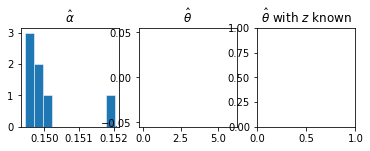

In [462]:
plt.subplot(2,3,1)
plt.title(r'$\hat\alpha$')
plt.hist(df['alpha_est'], edgecolor='white', linewidth=0.5)

plt.subplot(2,3,2)
plt.title(r'$\hat\theta$')
plt.hist(df['theta_est'], bins = np.linspace(0,6,30), edgecolor='white', linewidth=0.5)

plt.subplot(2,3,3)
plt.title(r'$\hat\theta$ with $z$ known')
plt.hist(df['theta_z_known_est'], bins = np.linspace(0,6,30), edgecolor='white', linewidth=0.5)

plt.subplot(2,3,4)
plt.title(r'$\hat z$')
plt.hist(df['z_est'], bins = np.linspace(300,600,30), edgecolor='white', linewidth=0.5)

plt.subplot(2,3,5)
plt.title(r'scatterplot of $(\hat\theta,\hat z)$')
plt.scatter(df['theta_est'], df['z_est'], alpha=0.9, s=0.5)

plt.tight_layout()
plt.show()

# plt.savefig('estimates_neg.pdf')

In [464]:
negdata = negdata.loc[negdata['theta_est'] > -20, ]

In [468]:
negdata




,index,epsilon,alpha,theta,z,max_weight,energy,tetra_volume,tetra_circum,face_surf,...,point_degree,cells,vertices,removable,epsilon_est,face_est,alpha_est,theta_est,z_est,theta_known_z_est
6,0,0,0.15,-2,500,0.01,-266.084,"[0.000645798, 0.000223948, 0.00060289, 0.00010...","[0.124965, 0.136399, 0.12659, 0.0967795, 0.115...","[0.00827205, 0.00966196, 0.00498368, 0.0091679...",...,"[8, 9, 17, 20, 18, 22, 14, 10, 16, 19, 25, 22,...",628,204,90,0.008972,0.000361,0.149635,-1.175740,325.440,0.705785
10,0,0,0.15,-2,500,0.01,-270.070,"[0.000104715, 6.53e-05, 0.000214244, 0.0004741...","[0.121231, 0.0952681, 0.119729, 0.122459, 0.07...","[0.00695524, 0.00696956, 0.0135803, 0.016873, ...",...,"[13, 18, 9, 11, 18, 20, 11, 20, 15, 19, 17, 11...",632,204,99,0.013968,0.000349,0.152029,-1.626880,334.991,0.202403
13,0,0,0.15,-2,500,0.01,-260.536,"[0.000317807, 0.000113696, 0.000116207, 0.0007...","[0.106087, 0.092792, 0.071258, 0.1355, 0.14250...","[0.0138518, 0.0146795, 0.0139556, 0.0140591, 0...",...,"[16, 16, 12, 14, 15, 18, 15, 11, 20, 13, 20, 1...",562,194,85,0.011051,0.000692,0.149663,-0.177031,345.198,1.405900
14,0,0,0.15,-2,500,0.01,-259.306,"[0.00137162, 0.000196421, 0.000217832, 0.00022...","[0.147234, 0.0854788, 0.10186, 0.102878, 0.136...","[0.0198528, 0.0181798, 0.0184879, 0.00970013, ...",...,"[14, 14, 18, 17, 20, 11, 20, 16, 19, 20, 24, 2...",576,189,99,0.019038,0.000595,0.149970,-1.141670,309.766,0.943447
26,0,0,0.15,-2,500,0.01,-264.033,"[0.000688683, 0.000183235, 0.000393197, 0.0001...","[0.135378, 0.0948311, 0.111563, 0.0895501, 0.1...","[0.0112694, 0.0129914, 0.0160467, 0.0114554, 0...",...,"[14, 12, 20, 16, 18, 15, 12, 13, 11, 24, 12, 1...",643,210,111,0.015601,0.000348,0.149446,-0.435953,337.637,1.244840
27,0,0,0.15,-2,500,0.01,-267.926,"[0.000632009, 0.000290788, 0.000107565, 0.0002...","[0.123456, 0.107738, 0.0669277, 0.113412, 0.14...","[0.0237056, 0.0191073, 0.0114605, 0.0131071, 0...",...,"[18, 15, 18, 19, 16, 20, 21, 9, 12, 22, 14, 18...",663,208,96,0.013365,0.000327,0.149770,-1.585170,330.973,0.277723
39,0,0,0.15,-2,500,0.01,-261.916,"[0.00020699, 0.00109455, 0.000357485, 0.000628...","[0.108581, 0.149529, 0.121204, 0.139183, 0.100...","[0.0186425, 0.00450203, 0.0186425, 0.00588716,...",...,"[12, 18, 19, 14, 18, 18, 23, 18, 12, 13, 16, 2...",640,195,101,0.024324,0.000604,0.149798,-0.667330,325.406,1.180610


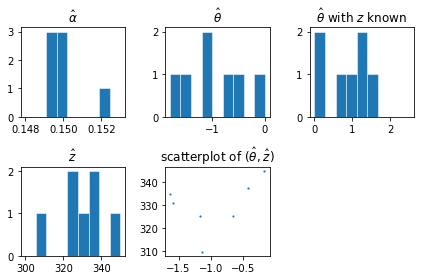

In [479]:
plt.subplot(2,3,1)
plt.title(r'$\hat\alpha$')
plt.hist(negdata['alpha_est'], bins = np.linspace(0.148,0.153,10), edgecolor='white', linewidth=0.5)

plt.subplot(2,3,2)
plt.title(r'$\hat\theta$')
plt.hist(negdata['theta_est'], bins = np.linspace(-1.8,0,10), edgecolor='white', linewidth=0.5)

plt.subplot(2,3,3)
plt.title(r'$\hat\theta$ with $z$ known')
plt.hist(negdata['theta_known_z_est'], bins = np.linspace(0,2.5,10), edgecolor='white', linewidth=0.5)

plt.subplot(2,3,4)
plt.title(r'$\hat z$')
plt.hist(negdata['z_est'], bins = np.linspace(300,350,10), edgecolor='white', linewidth=0.5)

plt.subplot(2,3,5)
plt.title(r'scatterplot of $(\hat\theta,\hat z)$')
plt.scatter(negdata['theta_est'], negdata['z_est'], alpha=0.9, s=1.5)

plt.tight_layout()
# plt.show()

plt.savefig('estimates_neg.pdf')

### Parsing SLURM logs

In [483]:
def extract_data(filename):
    lines = []
    with open(filename,  'r') as slurm:
        for line in slurm:
            lines += [line]
            
    numbers_unflat = [re.findall("\d+\.\d+|\d+", line) for line in lines]
    data = []
    if len(numbers_unflat) == 12:
        numbers = [float(number) for sublist in numbers_unflat for number in sublist]
        data = [filename] + [numbers[i] for i in [3,4,5,6,7,8,11,12,13,14,15,16,18,19,20]]

    return(data)

In [484]:
columns = ['filename','theta','epsilon','alpha','z','max_weight', 'iterations','pts','pts_active','pts_removable','min_edge_est','epsilon_est','alpha_est','theta_est','z_est','theta_z_known_est']

df = pd.DataFrame(columns=columns)

In [485]:
data = []
success = 0
total = 0

for filename in os.listdir('slurmlogs'):
    total += 1
    slurm_parsed = extract_data('slurmlogs/' + filename) 
    if len(slurm_parsed) == 16:
        data += [slurm_parsed]
        success += 1
    
print('Success rate:', success, 'out of', total,'. (',success/total, ')')

Success rate: 303 out of 303 . ( 1.0 )


# Diagnostic plots

In [292]:
log = pd.read_csv('log_3_6_20180904_02_03_08_75254.csv', sep=',')

### Accept + move type statistics

In [293]:
log['accept'].value_counts()

0.0    1852796
1.0    1079651
Name: accept, dtype: int64

In [294]:
log['type'].value_counts()

D    1000516
M    1000368
B     999116
Name: type, dtype: int64

In [295]:
log.groupby('accept')['type'].value_counts()

accept  type
0.0     M       701017
        D       596852
        B       554927
1.0     D       403664
        B       403395
        M       272592
Name: type, dtype: int64

### Convergence

In [310]:
log['time'] = log['time'].replace(math.nan,'',regex=True)
log['time'] = pd.to_numeric(log['time'])

In [322]:
block_length = 40000
groupby_blocks = np.repeat(range(int(len(log)/block_length)),block_length)
groupby_blocks = np.array([0] + list(groupby_blocks+1))[0:-1]

In [323]:
groupedlog = log.groupby([groupby_blocks, 'type'])['accept'].sum().reset_index()

In [324]:
groupedmeanlog = log.groupby([groupby_blocks])['energy','no_act_vrt','time'].mean().reset_index()

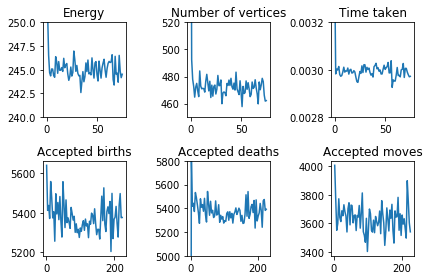

In [348]:
plt.subplot(2,3,1)
plt.title('Energy')
plt.ylim(240,250)
groupedmeanlog['energy'].plot()

plt.subplot(2,3,2)
plt.title('Number of vertices')
plt.ylim(450,520)
groupedmeanlog['no_act_vrt'].plot()

plt.subplot(2,3,3)
plt.title('Time taken')
plt.ylim(0.0028,0.0032)
groupedmeanlog['time'].plot()

plt.subplot(2,3,4)
plt.title('Accepted births')
groupedlog[groupedlog['type'] == 'B']['accept'].plot()

plt.subplot(2,3,5)
plt.title('Accepted deaths')
plt.ylim(5000,5800)
groupedlog[groupedlog['type'] == 'D']['accept'].plot()

plt.subplot(2,3,6)
plt.title('Accepted moves')
groupedlog[groupedlog['type'] == 'M']['accept'].plot()


plt.tight_layout()
#plt.show()

plt.savefig('convergence.pdf')

### Checking if the energy does not move by itself

In [89]:
lognona = log[~log.isnull().any(axis=1)]
logshift = lognona.assign(shiftenergy = lognona['energy'].shift(-1))

In [90]:
logshift[(logshift['shiftenergy'] - logshift['energy'] != 0) & (logshift['accept'] != 1)]

,step_no,type,pt,pt_mv,energy,energy_after,b,ratio,accept,no_vrt,no_act_vrt,time,shiftenergy
1999999,2000000,B,0.260079 0.576914 0.170576 0.0041291,,145.211,-1.0,0.762074,0.511364,0.0,6142.0,871.0,0.002197,NaN
